In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from pylab import rcParams
rcParams['figure.figsize'] = 15,10

import warnings
warnings.filterwarnings('ignore')


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
train_path = '/content/drive/MyDrive/ds_study/ML/02.titanic/train.csv'
test_path = '/content/drive/MyDrive/ds_study/ML/02.titanic/test.csv'

In [6]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
view_cols = ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']


#### Pclass</br>
: 등급이 높을수록 생존률이 높다.
</br></br>

#### Sex</br>
: 여성의 생존률이 압도적으로 높다.
</br></br>

#### Age</br>
: 10세이하, 77~78세 이상일 경우 생존률이 높다.
</br></br>

#### SipSp</br>
: 가족의 동행자가 1명일 경우가 생존률이 가장 높다.
</br></br>

#### Parch</br>
: 동승한 부모 혹은 자식 수 1~3의 비슷한 수준의 생존률을 보여주었다.
</br></br>

#### Fare</br>
: 요금 단위의 100 이하에 사망자들이 몰려있는 것으로 보인다.
</br></br>

#### Embarked</br>
: C 항구에서 탑승한 승객의 생존률이 높다.


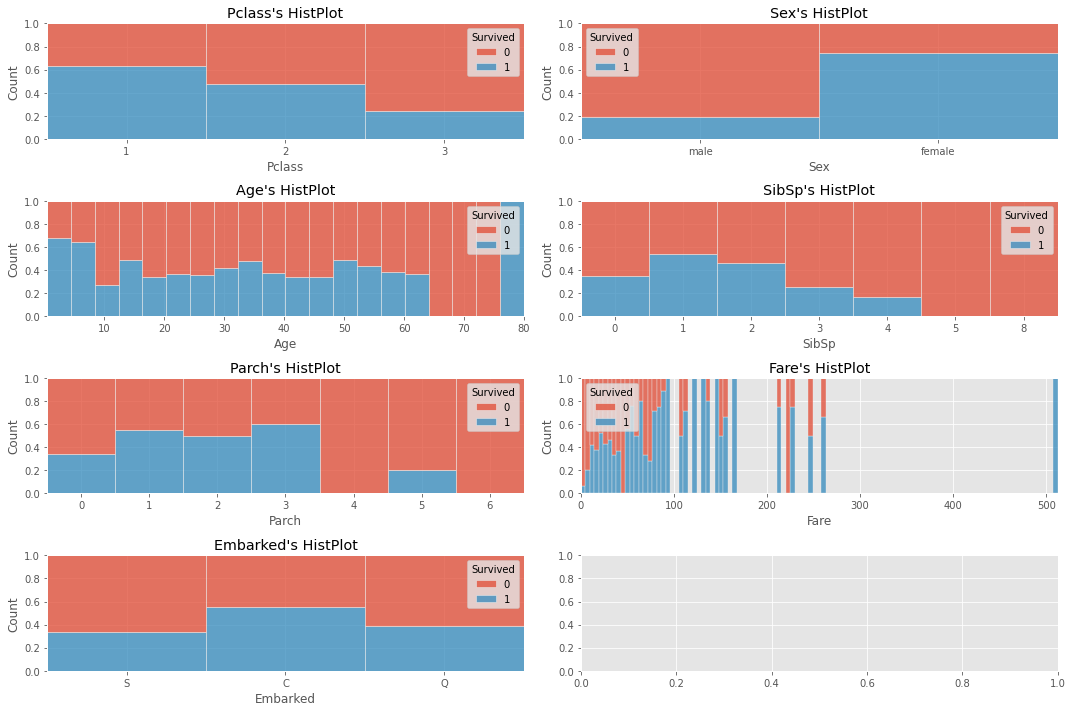

In [ ]:
fig, axes = plt.subplots(4,2)
for idx, col in enumerate(view_cols):
  ax = axes[idx//2, idx%2]
  target_df = train_df[[col, 'Survived']]
  if col in ['Pclass', 'SibSp', 'Parch']:
    target_df[col] = target_df[col].astype(str)
    target_df.sort_values(col, inplace=True)
  sns.histplot(data = target_df, x = col, label=col, hue = 'Survived', ax = ax, multiple='fill')
  ax.set_title(col+"'s HistPlot")

plt.tight_layout()
plt.show()

In [ ]:
categorical_cols = ['Name', 'Ticket', 'Cabin']

In [ ]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
# Mr., Mrs., Miss, Unknown 4가지로 분류 후 시각화

def containString(value):
  if 'Mrs' in value:
    return 'Mrs'
  elif 'Miss' in value:
    return 'Miss'
  elif 'Mr' in value:
    return 'Mr'
  else:
    return 'Unknown'

train_df['NameDiv'] = train_df['Name'].apply(containString)


In [ ]:
train_df['NameDiv'].value_counts()

Mr         518
Miss       180
Mrs        129
Unknown     64
Name: NameDiv, dtype: int64

#### Name</br>
: 다양한 이름을 분류하기 위해 Mr, Miss, Mrs, 그 외 4가지로 분류 진행.</br>
Mr : 518, 
Miss : 180,
Mrs : 129,
Unknown : 64으로 분류 됐다.</br>
Mr(남성)의 생존률이 굉장히 낮았다. 여성의 경우 Mrs일 경우 생존률이 더 높았다.


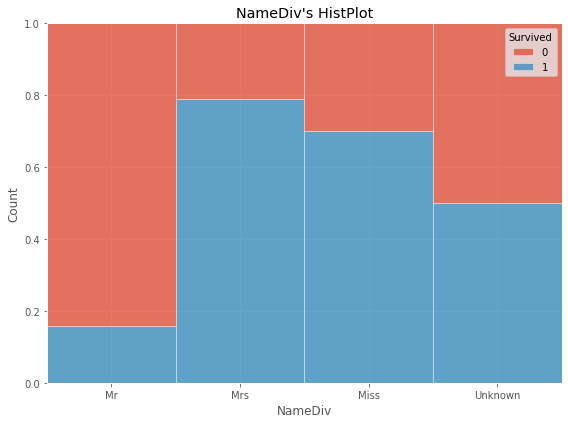

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data = train_df , x= 'NameDiv', hue = 'Survived', label='NameDiv', multiple='fill')
plt.title("NameDiv's HistPlot")
plt.tight_layout()
plt.show()

In [ ]:
# 티켓
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [ ]:
# 숫자라벨만 있는 티켓과 없는 티켓?
import re

def divTicket(value):
  if re.search('[a-zA-z]*', value).group(0):
    return 'Mixed'
  else:
    return 'Number'


In [ ]:
train_df['divTicket'] = train_df['Ticket'].apply(divTicket)

In [ ]:
train_df['divTicket'].value_counts()

Number    661
Mixed     230
Name: divTicket, dtype: int64


#### Ticket</br>
: 티켓에 대한 분류 방법이 보이지 않아 숫자만 있는 티켓과 혼합된 티켓으로 분류.</br>
Number : 661, 
Mixed : 230</br>
티켓이 생존 구분하는데 영향을 줄 수 있는지 알 수 없었다. 다른 분류 방법이 있는지 찾아봐야할 듯.


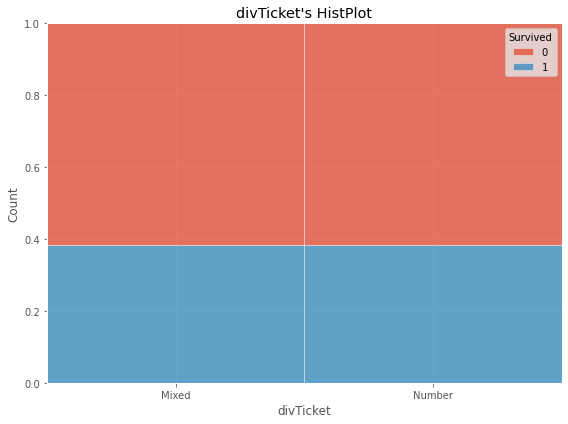

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data = train_df , x= 'divTicket', hue = 'Survived', label='divTicket', multiple='fill')
plt.title("divTicket's HistPlot")
plt.tight_layout()
plt.show()

In [ ]:
train_df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
# 첫번째 알파벳 기준으로 객실 구분해보기 숫자만 있으면 None

def divCabin(value):
  try:
    if re.search('^[A-z]*', value).group(0):
      return str(re.search('^[A-z]*', value).group(0))
    else:
      return 'None'
  except:
    return 'None'

In [ ]:
train_df['divCabin'] = train_df['Cabin'].apply(divCabin)

In [ ]:
train_df['divCabin'].value_counts()

None    687
C        59
B        47
D        33
E        32
A        15
F        13
G         4
T         1
Name: divCabin, dtype: int64


#### Cabin</br>
: 객실 데이터에서 시작이 알파벳으로 시작하는 것으로 분류</br>

---
None : 687,</br>
C : 59,</br>
B : 47,</br>
D : 33,</br>
E : 32,</br>
A : 15,</br>
F : 13,</br>
G : 4,</br>
T : 1</br>

---

알파벳으로 시작하지 않는 데이터가 많았다. 입석인가라는 생각이 들었지만 그렇게 처리하기에는 너무 많은량이라 고민해봐야할 듯.</br>
이러한 점을 제외하고 데이터의 분포만 본다면 객실에 대한 정보가 있을 경우 생존률이 높다고 볼 수 있다.


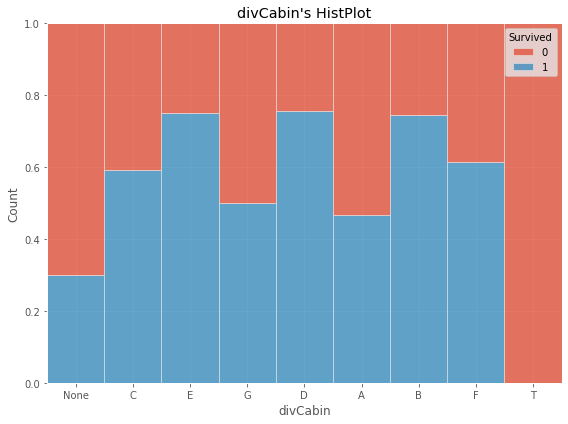

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data = train_df , x= 'divCabin', hue = 'Survived', label='divCabin', multiple='fill')
plt.title("divCabin's HistPlot")
plt.tight_layout()
plt.show()

## 모델 적용

- 결측값이 있는 피처는 사용하지 않음.('Age', 'Fare')
- 커스텀 분리 후 생존 예측에 의미있을것이라 추측한 'Cabin', 'Name'은 분류 피처로 사용

In [ ]:
test_df['NameDiv'] = test_df['Name'].apply(containString)
test_df['divCabin'] = test_df['Cabin'].apply(divCabin)

In [ ]:
drop_cols = ['PassengerId', 'Ticket', 'Cabin', 'Name', 'Age', 'Fare', 'divTicket']
train_df_modify = train_df.drop(drop_cols, axis=1)

test_df_modify = test_df.drop(drop_cols[:-1], axis=1)


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_col = ['Sex', 'NameDiv', 'divCabin','Embarked']
les = []

for col in label_col:
  le = LabelEncoder()
  train_df_modify[col] = le.fit_transform(train_df_modify[col])
  test_df_modify[col] = le.transform(test_df_modify[col])
  les.append(le)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

X = train_df_modify.drop('Survived', axis=1)
y = train_df_modify['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
logi = LogisticRegression()

In [ ]:
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
logi.fit(X_train, y_train)

tree_pred = tree.predict(test_df_modify)
rf_pred = rf.predict(test_df_modify)
xgb_pred = xgb.predict(test_df_modify)
logi_pred = logi.predict(test_df_modify)

In [ ]:
from sklearn.metrics import accuracy_score

print("DecisionTree : {:.2f}%" .format(tree.score(X_test, y_test)*100))
print("RandomForest : {:.2f}%" .format(rf.score(X_test, y_test)*100))
print("XGBoost : {:.2f}%" .format(xgb.score(X_test, y_test)*100))
print("Logisitc : {:.2f}%" .format(logi.score(X_test, y_test)*100))

DecisionTree : 81.56%
RandomForest : 83.80%
XGBoost : 82.12%
Logisitc : 80.45%


In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/ds_study/ML/02.titanic/submission.csv')

In [ ]:
submission['Survived'] = rf_pred

In [ ]:
submission.to_csv('/content/drive/MyDrive/ds_study/ML/02.titanic/submission.csv', index=False)

## 정확도 약 72%

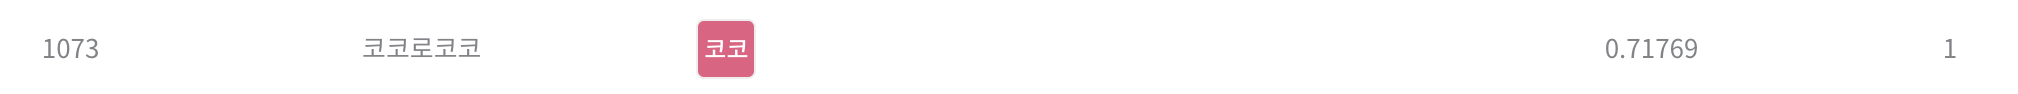

### 다시 전처리

- 전처리 해볼만한 사항
  - 이름
    - 4가지(Mr, Mrs, Miss, None)보다 더 세분화 분류가 가능한가?
  - 나이
    - 나이 피처를 사용하기 위해 대체값은 어떻게?
      - 평균, 최빈값, 이름 피처로 추측
  - 요금
    - 요금 피처를 사용하기 위한 대체값은 어떻게?
      - 그룹 최빈값?, 평균?
      


In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 별칭 부분의 끝이 모두 '.'으로 끝나 이부분만 추출해보기로함

In [11]:
import re 

def divName(value):
  return re.search('([A-Za-z]*[.]+)', value).group(1)[:-1]

In [ ]:
train_df_modify = train_df.copy()
test2_df = test_df.copy()

train_df_modify['divName'] = train_df_modify['Name'].apply(divName)
test2_df['divName'] = test2_df['Name'].apply(divName)

In [ ]:
train_df_modify['divName'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

### 별칭 분류 
- 분류가 너무 큰 범주로 이뤄져 있었음. 새롭게 별칭을 분류

- Mr, Mrs, Master, Miss
  - Mr(성인 남자), Mrs(성인 여자)
  - Master(어린 남자), Miss(어린 여자)

- 그 외
  - 'Ms'는 20 ~ 40대 여성을 부르긴 하지만 20 ~ 30대에게 주로 사용한 다는 점에서 Miss로 사용
  - 'Mme'는 프랑스에서 마담을 부르는 별칭으로 'Mrs'로 대체
  - 'Major'는 법적으로 성년을 나타내는 의미. 남자는 Master, 여자는 Miss로 대체
  - 'Lady' 젊은 여성을 부른는 말로 'Miss'로 대체
  - 'Sir'는 남성을 존경하는 의미 높임말로 Mr로 대체
  - 'Mlle'는 프랑스에서 어른 남자아이를 부르는 말로 'Master'로 대체

- 이 조건에 포함되지 않는 별칭은 구분이 불가능하므로 Unkown 사용


In [ ]:
# Mr., Mrs., Miss, Unknown 4가지로 분류 후 시각화

def divName_keyword1(value):
  if 'Mrs' in value:
    return 'Mrs'
  elif 'Miss' in value:
    return 'Miss'
  elif 'Mr' in value:
    return 'Mr'
  else:
    return 'Unknown'


def divName_keyword2(name, sex):
  
  text_Mr = ['Mr', 'Sir']
  text_Mrs = ['Mrs', 'Mme']
  text_Master = ['Master', 'Mlle']
  text_Miss = ['Miss', 'Lady', 'Ms']

  if name in text_Mr:
    return 'Mr'

  elif name in text_Mrs:
    return 'Mrs'
  
  elif name in text_Master:
    return 'Master'
    
  elif name in text_Miss:
    return 'Miss'
  
  elif name == 'Major':
    if sex == 'male':
      return 'Master'
    else:
      return 'Miss'

  else:
    return 'Unknown'
    

In [ ]:
train_df_modify['divName_keyword1'] = train_df_modify['Name'].apply(divName_keyword1)
train_df_modify['divName_keyword2'] = train_df_modify.apply(lambda x : divName_keyword2(x['divName'], x['Sex']), axis=1)

test2_df['divName_keyword1'] = test2_df['Name'].apply(divName_keyword1)
test2_df['divName_keyword2'] = test2_df.apply(lambda x : divName_keyword2(x['divName'], x['Sex']), axis=1)

In [ ]:
train_df_modify['divName_keyword2'].value_counts()

Mr         518
Miss       184
Mrs        126
Master      44
Unknown     19
Name: divName_keyword2, dtype: int64

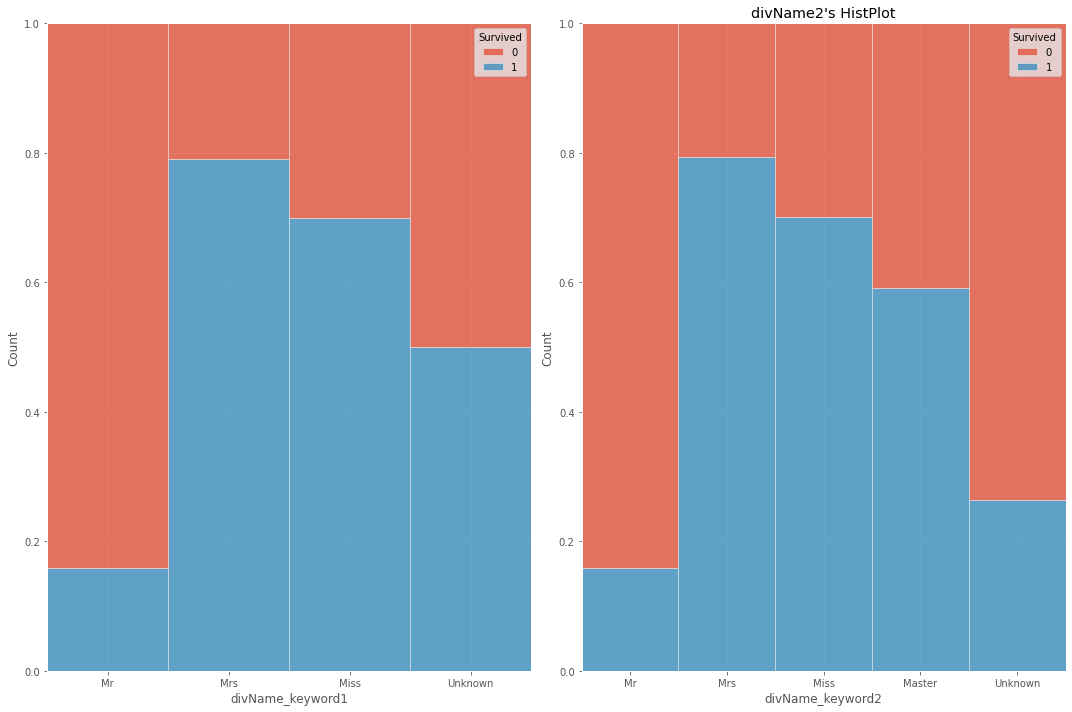

In [ ]:
fig, ax = plt.subplots(1,2)

sns.histplot(data = train_df_modify , x= 'divName_keyword1', hue = 'Survived', label='divName1', multiple='fill', ax= ax[0])
sns.histplot(data = train_df_modify , x= 'divName_keyword2', hue = 'Survived', label='divName2', multiple='fill', ax = ax[1])

plt.title("divName2's HistPlot")
plt.tight_layout()
plt.show()

### 새로운 분류 후 비교
- 성인 남자, 여자, 젊은 여성의 생존률에는 큰 변화가 없었음.
- 50% 정도 되던 알 수 없는 생존자들의 대부분이 젊은 남성이었던 것으로 보임
- 이전 분류보다 생존자 분류에 의미가 있어 보임.


#### 나이

<AxesSubplot:xlabel='Age', ylabel='Count'>

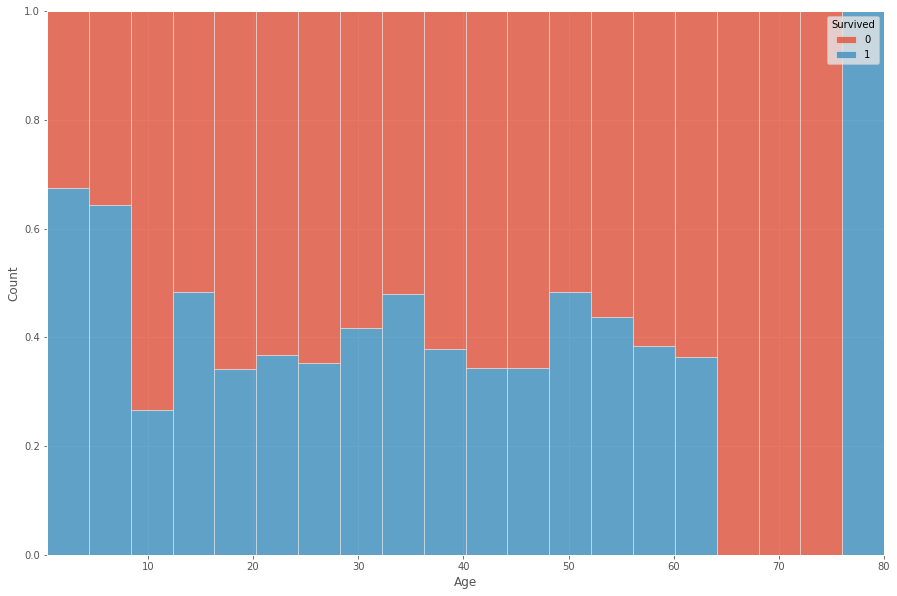

In [ ]:
sns.histplot(data= train_df_modify, x='Age', hue='Survived', multiple='fill')

In [ ]:
train_df_modify['Age'].isnull().sum()

177

In [ ]:
test2_df['Age'].isnull().sum()

86

In [ ]:
# 나이를 모르는 데이터 
target = train_df_modify[train_df_modify['Age'].isnull()]

for key in train_df_modify['divName_keyword2'].unique():
  print(key, " : ", len(target[target['divName_keyword2'] == key]))

Mr  :  119
Mrs  :  17
Miss  :  36
Master  :  4
Unknown  :  1


In [ ]:
# 나이를 아는 데이터
target = train_df_modify[~train_df_modify['Age'].isnull()]
for key in train_df_modify['divName_keyword2'].unique():
  print(key)
  print(target[target['divName_keyword2'] == key]['Age'].describe())
  print()

Mr
count    399.000000
mean      32.409774
std       12.720098
min       11.000000
25%       23.000000
50%       30.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

Mrs
count    109.000000
mean      35.788991
std       11.437490
min       14.000000
25%       27.000000
50%       35.000000
75%       44.000000
max       63.000000
Name: Age, dtype: float64

Miss
count    148.000000
mean      21.993243
std       13.089921
min        0.750000
25%       14.375000
50%       21.000000
75%       30.000000
max       63.000000
Name: Age, dtype: float64

Master
count    40.000000
mean      7.741750
std      10.972532
min       0.420000
25%       1.750000
50%       4.000000
75%       9.000000
max      52.000000
Name: Age, dtype: float64

Unknown
count    18.000000
mean     44.888889
std      12.942810
min      23.000000
25%      34.250000
50%      46.500000
75%      54.000000
max      70.000000
Name: Age, dtype: float64



- 별칭에 대한 분류가 완벽하지 않음이 보였음. 따라서 평균값보다는 중간값을 사용하는게 맞다고 판단함.

In [ ]:
for key in train_df_modify['divName_keyword2'].unique():
  print(key)
  print(target[target['divName_keyword2'] == key]['Age'].median())
  print()

Mr
30.0

Mrs
35.0

Miss
21.0

Master
4.0

Unknown
46.5



In [ ]:
target = train_df_modify[train_df_modify['Age'].isnull()]
target2 = test2_df[test2_df['Age'].isnull()]

for key in train_df_modify['divName_keyword2'].unique():
  modify_index = target[target['divName_keyword2'] == key].index
  modify_index2 = target2[target2['divName_keyword2'] == key].index

  if key =='Mr':
    train_df_modify['Age'].loc[modify_index] = 30
    test2_df['Age'].loc[modify_index2] = 30

  elif key == 'Mrs':
    train_df_modify['Age'].loc[modify_index] = 35
    test2_df['Age'].loc[modify_index2] = 35
  
  elif key == 'Miss':
    train_df_modify['Age'].loc[modify_index] = 21
    test2_df['Age'].loc[modify_index2] = 21

  elif key == 'Master':
    train_df_modify['Age'].loc[modify_index] = 4
    test2_df['Age'].loc[modify_index2] = 4

  elif key == 'Unknown':
    train_df_modify['Age'].loc[modify_index] = 46
    test2_df['Age'].loc[modify_index2] = 46

In [ ]:
train_df_modify['Age'].isnull().sum(), test2_df['Age'].isnull().sum() 

(0, 0)

<AxesSubplot:xlabel='Age', ylabel='Count'>

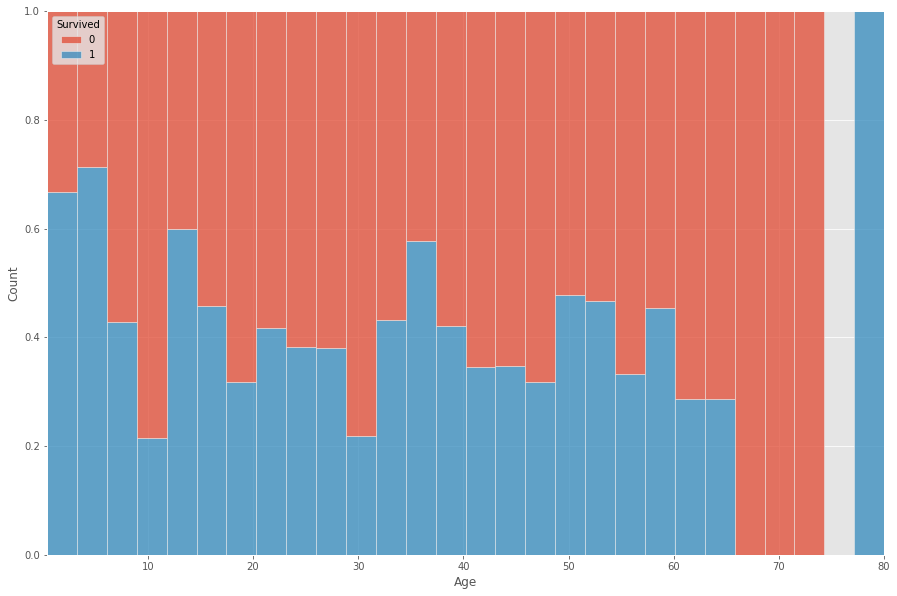

In [ ]:
sns.histplot(data= train_df_modify, x='Age', hue='Survived', multiple='fill')

In [ ]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
train_df_modify[train_df_modify['Pclass']==3][train_df_modify[train_df_modify['Pclass']==3]['Age']>60]['Fare'].mean()

7.82

- 요금에 대한 결측값은 최종 테스트 데이터에 한 개만 존재하여 훈련 데이터에서 등급이 같고 나이가 60세 이상인 사람(4명)의 평균 요금으로 대체

In [ ]:
test_df['Fare'].loc[152] = 7.82

In [ ]:
train_df_modify['divCabin'] = train_df_modify['Cabin'].apply(divCabin)
test2_df['divCabin'] = test2_df['Cabin'].apply(divCabin)

In [ ]:
train_df_modify.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,divName,divName_keyword1,divName_keyword2,divCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr,Mr,Mr,None


In [ ]:
test2_df.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,divName,divName_keyword1,divName_keyword2,divCabin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,Mr,Mr,None


#### 다시 모델 적용

In [ ]:
drop_cols = ['PassengerId', 'Ticket', 'Cabin', 'Name', 'divName_keyword1', 'divName']

train_df_modify = train_df_modify.drop(drop_cols, axis=1)
test2_df = test2_df.drop(drop_cols, axis=1)


In [ ]:
label_col = ['Sex', 'divName_keyword2', 'divCabin','Embarked']
les = []

for col in label_col:
  le = LabelEncoder()
  train_df_modify[col] = le.fit_transform(train_df_modify[col])
  test2_df[col] = le.transform(test2_df[col])
  les.append(le)



In [ ]:
X = train_df_modify.drop('Survived', axis=1)
y = train_df_modify['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
logi = LogisticRegression()

tree.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
logi.fit(X_train, y_train)

tree_pred = tree.predict(test2_df)
rf_pred = rf.predict(test2_df)
xgb_pred = xgb.predict(test2_df)
logi_pred = logi.predict(test2_df)

print("DecisionTree : {:.2f}%" .format(tree.score(X_test, y_test)*100))
print("RandomForest : {:.2f}%" .format(rf.score(X_test, y_test)*100))
print("XGBoost : {:.2f}%" .format(xgb.score(X_test, y_test)*100))
print("Logisitc : {:.2f}%" .format(logi.score(X_test, y_test)*100))

DecisionTree : 75.42%
RandomForest : 79.89%
XGBoost : 81.01%
Logisitc : 80.45%


In [ ]:
submission['Survived'] = xgb_pred
submission.to_csv('/content/drive/MyDrive/ds_study/ML/02.titanic/submission2.csv', index=False)

#### 소폭 상승
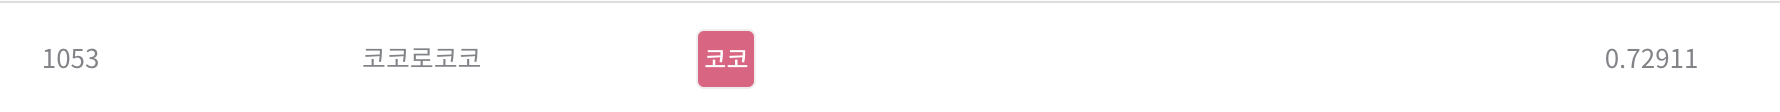

#### 객실에 대한 데이터가 부실했으니 없이 ..?

In [ ]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'divName_keyword2', 'divCabin'],
      dtype='object')

In [ ]:
X = train_df_modify.drop(['Survived','divCabin'], axis=1)
y = train_df_modify['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
logi = LogisticRegression()

tree.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
logi.fit(X_train, y_train)

tree_pred = tree.predict(test2_df.drop('divCabin', axis=1))
rf_pred = rf.predict(test2_df.drop('divCabin', axis=1))
xgb_pred = xgb.predict(test2_df.drop('divCabin', axis=1))
logi_pred = logi.predict(test2_df.drop('divCabin', axis=1))

print("DecisionTree : {:.2f}%" .format(tree.score(X_test, y_test)*100))
print("RandomForest : {:.2f}%" .format(rf.score(X_test, y_test)*100))
print("XGBoost : {:.2f}%" .format(xgb.score(X_test, y_test)*100))
print("Logisitc : {:.2f}%" .format(logi.score(X_test, y_test)*100))

DecisionTree : 75.42%
RandomForest : 81.01%
XGBoost : 82.12%
Logisitc : 81.01%


In [ ]:
submission['Survived'] = xgb_pred
submission.to_csv('/content/drive/MyDrive/ds_study/ML/02.titanic/submission2.csv', index=False)

#### 훈련, 테스트 모두 큰 변화는 없었음 최종 데이터에는 0.2% 하락.. 의미있는 분류는 아니었음

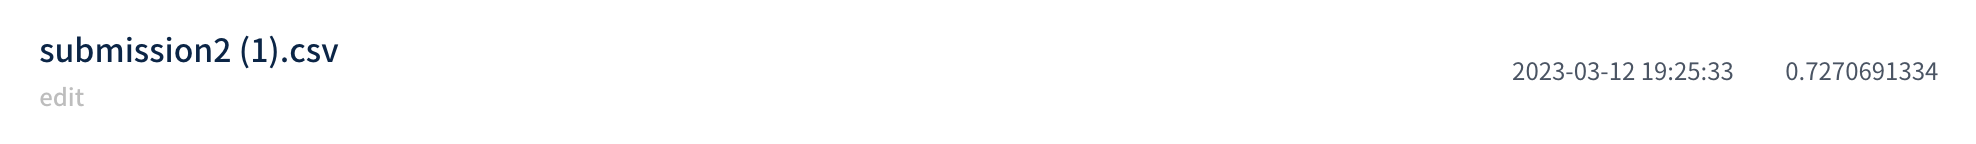

## 다시 전처리

### 수정해 볼 부분
- 별칭 구분을 생각한 기준대로 잘 분리되지 않았음을 알 수 있었음
- 나이를 먼저 확인하고 구분해주는 방식으로 처리
- 나이를 확인할때 나이를 유아, 청소년, 성인1, 성인2, 노인 5가지 그룹으로 나누기로함
  - 유아 : ~ 7세
  - 청소년 : ~17세
  - 성인1 : ~ 30세
  - 성인2 : ~ 59세
  - 노인 : 60세 ~

In [234]:
train_3 = train_df.copy()
test_3 = test_df.copy()

In [235]:
train_3['divName'] = train_3['Name'].apply(divName)
test_3['divName'] = test_3['Name'].apply(divName)

In [236]:
# 나이는 177개의 결측치가 있음. 이를 제외하고 우선 분류 진행
import numpy as np
def divAge(age):
  if age <= 5:
    return "child"
  elif age <= 17:
    return "Teenager"
  elif age <= 30:
    return 'Adult1'
  elif age <= 59:
    return "Adult2"
  elif age >= 60:
    return "Old man"
  else:
    return ''

In [237]:
train_3['divAge'] = train_3['Age'].apply(divAge)
test_3['divAge'] = test_3['Age'].apply(divAge)

In [295]:
def divName3(name, age, sex):
  
  text_Mr = ['Mr', 'Sir']
  text_Mrs = ['Mrs', 'Mme']
  text_Master = ['Master', 'Mlle']
  text_Miss = ['Miss', 'Lady', 'Ms']

  if name in text_Mr:
    if age <= 18:
      return 'Master'
    elif age >18:
      return 'Mr'
    else:
      return ''

  elif name in text_Mrs:
    if age <= 18:
      return 'Miss'
    elif age > 18:
      return 'Mrs'
    else:
      return ''
  
  elif name in text_Master:
    if age > 18:
      return 'Mr'
    elif age <= 18:
      return 'Master'
    else:
      return ''
    
  elif name in text_Miss:
    if age <= 18:
      return 'Miss'
    elif age > 18:
      return 'Ms'
    else:
      return ''
  
  elif name == 'Major':
    if sex == 'male':
      return 'Master'
    else:
      return 'Miss'

  else:
    return 'Unknown'
    

In [239]:
train_3['divName2'] = train_3.apply(lambda x : divName3(x['divName'], x['Age'], x['Sex']), axis=1)
test_3['divName2'] = test_3.apply(lambda x : divName3(x['divName'], x['Age'], x['Sex']), axis=1)


In [230]:
train_3[train_3['Age'].isnull()][train_3[train_3['Age'].isnull()]['divName2'] == 'Unknown']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,divName,divAge,divName2
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,,Unknown
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr,,Unknown
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs,,Unknown
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr,,Unknown
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss,,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,Mr,,Unknown
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Miss,,Unknown
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,Mr,,Unknown
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Mr,,Unknown


Dr 의사일 것을 추정 30세 이상의 남자일것으로 보고'Audult2'로 분류 하기로 함

나이에 대한 결측값은 평균과 중앙값이 크게 차이가 없고 나이대 분류에 영향을 주는 분류는 없기에 평균을 사용

In [231]:
import numpy as np

for key in train_3['divName2'].unique():
  traget = train_3[~train_3['Age'].isnull()]
  target = traget[traget['divName2'] == key]
  print(key , ' Avg Age : ', target['Age'].mean())
  print(key , ' Median Age : ', np.median(target['Age']))
  print('-----')


Mr  Avg Age :  33.937974683544304
Mr  Median Age :  31.0
-----
Mrs  Avg Age :  40.74561403508772
Mrs  Median Age :  39.0
-----
Miss  Avg Age :  23.184782608695652
Miss  Median Age :  23.5
-----
Unknown  Avg Age :  nan
Unknown  Median Age :  nan
-----
Master  Avg Age :  8.85637931034483
Master  Median Age :  9.0
-----
Girl  Avg Age :  9.236363636363636
Girl  Median Age :  9.0
-----


In [232]:
def divAgeNull(divName):
  if divName == 'Mr':
    return 'Adult2'
  elif divName == 'Mrs':
    return 'Adult2'
  elif divName == 'Miss':
    return 'Adult1'
  elif divName in ['Master', 'Girl']:
    return 'Teenager'
  else:
    return 'Adult2'

In [ ]:
diff_idx = [idx for idx, row in train_3.iterrows() if row['divName']!= row['divName2']]
train_3.loc[diff_idx]

In [240]:
test_3[test_3['Age'].isnull()]['divName2'].unique() # 테스트 셋은 알 수 없는 사람이 없음

array(['Unknown'], dtype=object)

In [186]:
train_age_index = train_3[train_3['Age'].isnull()].index
test_age_index = test_3[test_3['Age'].isnull()].index

In [187]:
train_3['divAge'].loc[train_age_index] = train_3['divName2'].loc[train_age_index].apply(divAgeNull)
test_3['divAge'].loc[test_age_index] = test_3['divName2'].loc[test_age_index].apply(divAgeNull)

In [188]:
len(train_3[train_3['divName2']=='']), len(test_3[test_3['divName2']==''])

(0, 0)

### 새로운 분류 동승자(passenger)
SipSp + Prach

- 0 : Solo
- 1 : Duo
- 2 ~ 3 : Family
- 4 ~ : Group



In [189]:
def divPassenger(sibsp, parch):
  cnt = sibsp + parch

  if cnt ==0:
    return 'Solo'
  elif cnt == 1:
    return 'Duo'
  elif cnt < 4:
    return 'Family'
  else:
    return 'Group'


In [190]:
train_3.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,divName,divAge,divName2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr,Adult1,Mr


In [191]:
train_3['Passenger'] = train_3.apply(lambda x : divPassenger(x['SibSp'], x['Parch']),axis=1)
test_3['Passenger'] = test_3.apply(lambda x : divPassenger(x['SibSp'], x['Parch']),axis=1)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

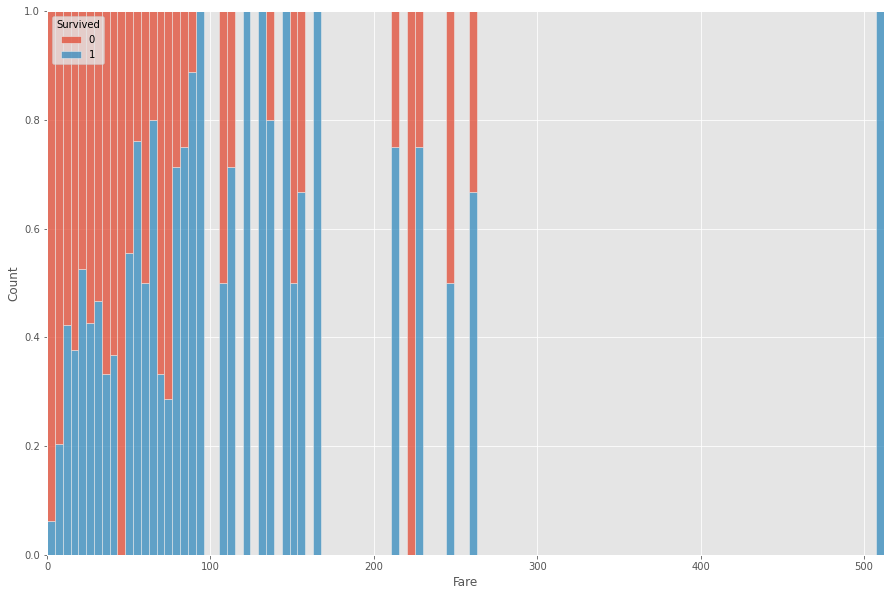

In [192]:
sns.histplot(data = train_3, x= 'Fare', hue='Survived', multiple='fill')

분류하기가 애매하긴하지만 요금이 100 이하 구간에서 확실히 돈을 많이 지불할수록 생존율이 더 높은게 눈에 보이므로 분류해보기로함. 특히나 100 이하에서 유독 차이가 나므로 저소득층은 2가지로 세부분류

- 저소득(~100)
  - 저소득1(~50)
  - 저소득2(~100)
- 중소득(~300)
- 고소득(300~)

In [193]:
train_3['Fare'].isnull().sum()

0

In [194]:
def divFareGrade(value):
  if value <= 50:
    return 'low1'
  elif value <= 100:
    return 'low2'
  elif value <= 300:
    return 'middle'
  else:
    return 'high'

In [195]:
train_3['FareGrade'] = train_3['Fare'].apply(divFareGrade)
test_3['FareGrade'] = test_3['Fare'].apply(divFareGrade)

### 모델 적용

In [196]:
drop_cols = ['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'divName']

# train_3.drop(drop_cols, axis=1)
train_3 = train_3.drop(drop_cols, axis=1)
test_3 = test_3.drop(drop_cols, axis=1)


In [197]:
label_col = ['Sex','Embarked', 'divAge', 'divName2', 'Passenger', 'FareGrade']
les = []

for col in label_col:
  le = LabelEncoder()
  train_3[col] = le.fit_transform(train_3[col])
  test_3[col] = le.transform(test_3[col])
  les.append(le)



In [198]:
train_3.head(1)

,Survived,Pclass,Sex,Embarked,divAge,divName2,Passenger,FareGrade
0,0,3,1,2,0,2,0,1


In [199]:
X = train_3.drop(['Survived'], axis=1)
y = train_3['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
logi = LogisticRegression()

tree.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
logi.fit(X_train, y_train)

tree_pred = tree.predict(test_3)
rf_pred = rf.predict(test_3)
xgb_pred = xgb.predict(test_3)
logi_pred = logi.predict(test_3)

print("DecisionTree : {:.2f}%" .format(tree.score(X_test, y_test)*100))
print("RandomForest : {:.2f}%" .format(rf.score(X_test, y_test)*100))
print("XGBoost : {:.2f}%" .format(xgb.score(X_test, y_test)*100))
print("Logisitc : {:.2f}%" .format(logi.score(X_test, y_test)*100))


DecisionTree : 81.56%
RandomForest : 82.12%
XGBoost : 82.68%
Logisitc : 78.77%


In [201]:
submission = pd.read_csv('/content/drive/MyDrive/ds_study/ML/02.titanic/submission.csv')
submission['Survived'] = xgb_pred
submission.to_csv('/content/drive/MyDrive/ds_study/ML/02.titanic/submission3.csv', index=False)
submission['Survived'] = rf_pred
submission.to_csv('/content/drive/MyDrive/ds_study/ML/02.titanic/submission3.csv', index=False)

### 결과

- submission2 - XGB / submission3 - RandForest</br>
랜덤 포레스트가 76%로 소폭 상승한 결과 보여줌

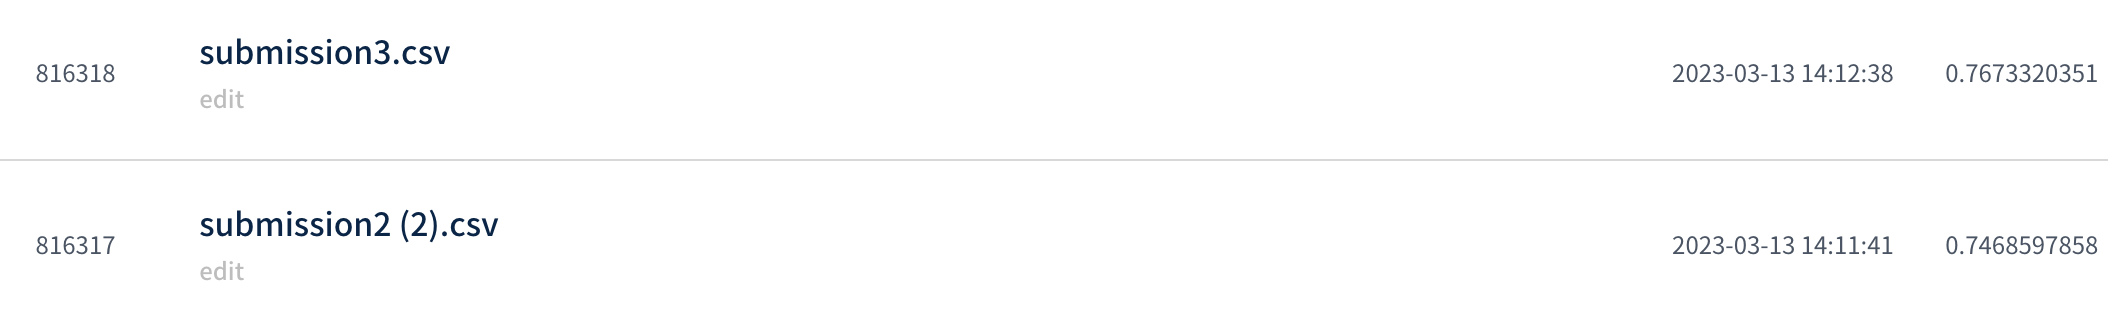



<AxesSubplot:>

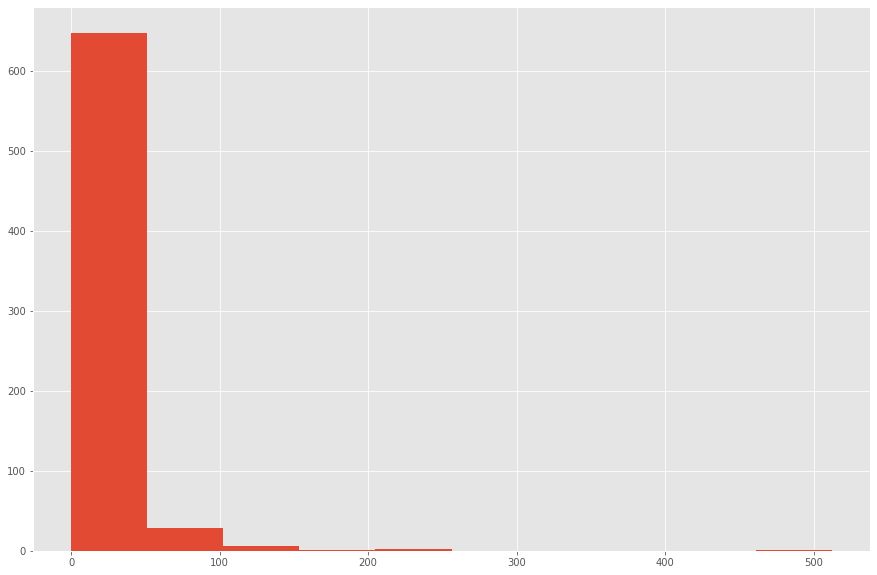

In [116]:
train_df[train_df['Cabin'].isnull()]['Fare'].hist()

<AxesSubplot:>

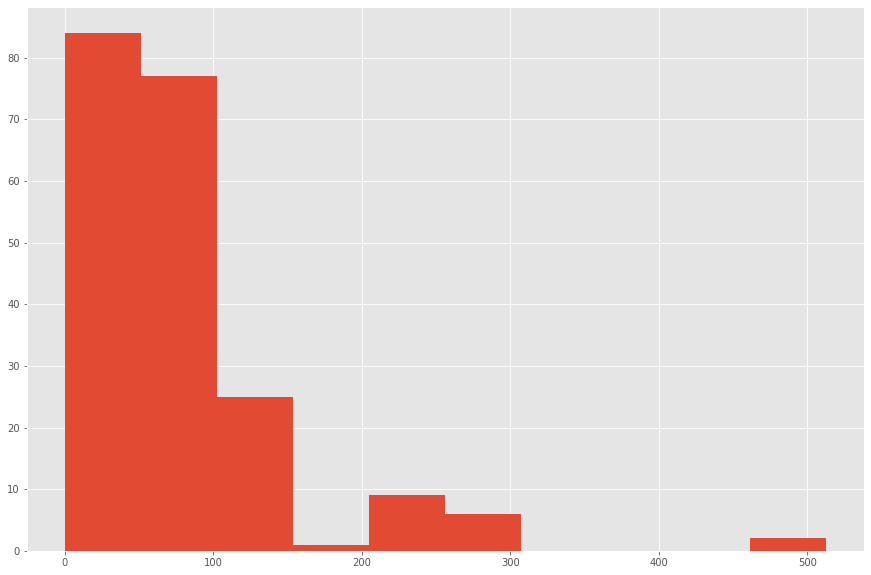

In [117]:
train_df[~train_df['Cabin'].isnull()]['Fare'].hist()

객실이 있는 승객이 돈을 많이 쓰긴함. 이런점에서 다시 객실에 대한 분류도 추가해서 적용해보기로 함.

In [139]:
def divCabin(value):
  try:
    if re.search('^[A-z]*', value).group(0):
      return str(re.search('^[A-z]*', value).group(0))
    else:
      return 'None'
  except:
    return 'None'
    
train_3['divCabin'] = train_df['Cabin'].apply(divCabin)
test_3['divCabin'] = test_df['Cabin'].apply(divCabin)

In [144]:
X = train_3.drop(['Survived'], axis=1)
y = train_3['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
logi = LogisticRegression()

tree.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
logi.fit(X_train, y_train)

tree_pred = tree.predict(test_3)
rf_pred = rf.predict(test_3)
xgb_pred = xgb.predict(test_3)
logi_pred = logi.predict(test_3)

print("DecisionTree : {:.2f}%" .format(tree.score(X_test, y_test)*100))
print("RandomForest : {:.2f}%" .format(rf.score(X_test, y_test)*100))
print("XGBoost : {:.2f}%" .format(xgb.score(X_test, y_test)*100))
print("Logisitc : {:.2f}%" .format(logi.score(X_test, y_test)*100))

DecisionTree : 81.01%
RandomForest : 84.36%
XGBoost : 84.36%
Logisitc : 78.77%


객실에 대한 정보가 없을때 보다 XGB, RF 둘 다 2%정도 상승함

In [145]:
submission = pd.read_csv('/content/drive/MyDrive/ds_study/ML/02.titanic/submission.csv')
submission['Survived'] = xgb_pred
submission.to_csv('/content/drive/MyDrive/ds_study/ML/02.titanic/submission4.csv', index=False)
submission['Survived'] = rf_pred
submission.to_csv('/content/drive/MyDrive/ds_study/ML/02.titanic/submission5.csv', index=False)

#### 결과

최종 테스트에서는 XGB는 상승했지만 RF 오히려 기존 모델보다 좋지 못한 결과를 보임

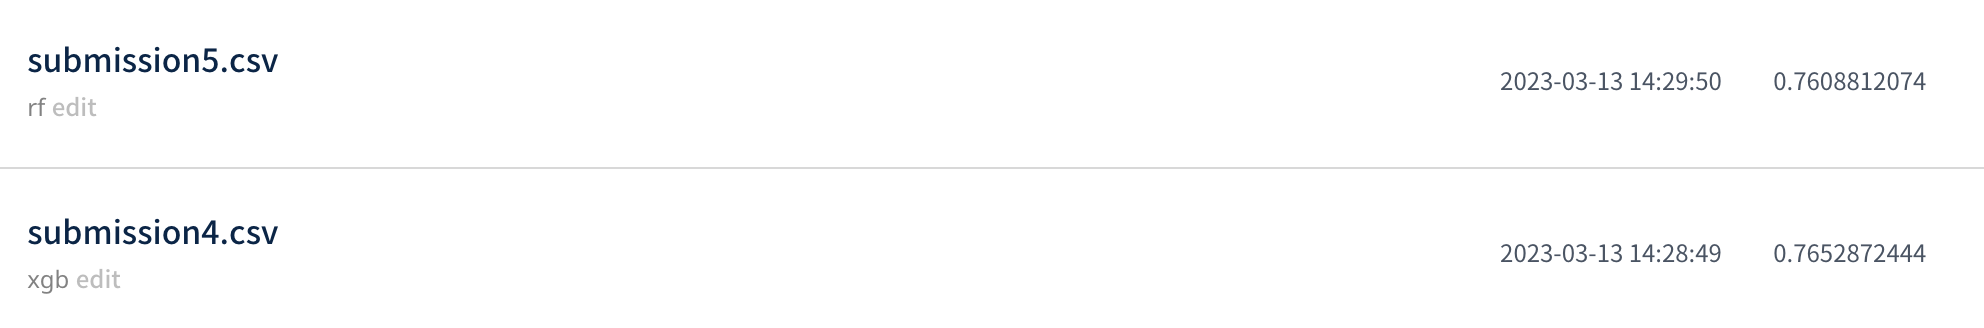



In [146]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 다시 전처리
분류를 좀 더 세부 분류해보기로함

- 나이
  - 유아1 : ~ 5세
  - 유아2 : ~ 10세
  - 청소년 : ~17세
  - 성인1 : ~ 30세
  - 성인2 : ~ 50세
  - 노인1 : ~ 60세
  - 노인2 : 60세 ~

- 동승객(Famil, Group만 수정)
  - 0 : Solo
  - 1 : Duo
  - 2 ~ 4 : Family
  - 5 ~ : Group


- 요금
  - 저소득(~100)
    - 저소득1(~30)
    - 저소득2(~60)
    - 저소득3(~100)
  - 중소득(~300)
    - 중소득1(~200)
    - 중소득2(~300)
  - 고소득(300~)

In [354]:
train_4 = train_df.copy()
test_4 = test_df.copy()

train_4['divName'] = train_4['Name'].apply(divName)
test_4['divName'] = test_4['Name'].apply(divName)

In [355]:
def divAge2(age):
  if age <= 5:
    return "child1"
  elif age <= 10:
    return "child2"
  elif age <= 17:
    return "Teenager"
  elif age <= 30:
    return 'Adult1'
  elif age <= 50:
    return "Adult2"
  elif age <= 60:
    return "Old man1"
  elif age > 60:
    return "Old man2"
  else:
    return ''

In [356]:
train_4['divAge'] = train_4['Age'].apply(divAge2)
test_4['divAge'] = test_4['Age'].apply(divAge2)


In [357]:
train_4['divName2'] = train_4.apply(lambda x : divName3(x['divName'], x['Age'], x['Sex']), axis=1)
test_4['divName2'] = test_4.apply(lambda x : divName3(x['divName'], x['Age'], x['Sex']), axis=1)

In [358]:
train_4['divAge'].unique()

array(['Adult1', 'Adult2', '', 'Old man1', 'child1', 'Teenager', 'child2',
       'Old man2'], dtype=object)

In [359]:
def fin_divName(divname, divage, sex):
  if 'child' in divage:
    if divname in ['Boy', 'Girl']:
      return divname
    else:
      if sex == 'male':
        return 'Boy'
      else:
        return 'Girl'

  elif 'Teenager' in divage:
    if divname in ['Master', 'Miss']:
      return divname
    else:
      if sex == 'male':
        return 'Master'
      else:
        return 'Miss'

  elif 'Adult' in divage:
    if divname in ['Mr', 'Ms','Mrs']:
      return divname
    else:
      if sex == 'male':
        return 'Mr'
      else:
        return 'Ms'
    
  elif 'Old man' in divage:
    if divname in ['Mr', 'Ms','Mrs']:
      return divname
    else:
      if sex == 'male':
        return 'Mr'
      else:
        return 'Mrs'
  
  else:
    return ''

In [360]:
train_4['finDivName'] = train_4.apply(lambda x : fin_divName(x['divName2'], x['divAge'], x['Sex']), axis=1)
test_4['finDivName'] = test_4.apply(lambda x : fin_divName(x['divName2'], x['divAge'], x['Sex']), axis=1)

In [361]:
import numpy as np

for key in train_4['finDivName'].unique():
  traget = train_4[~train_3['Age'].isnull()]
  target = traget[traget['finDivName'] == key]
  print(key , ' Avg Age : ', target['Age'].mean())
  print(key , ' Median Age : ', np.median(target['Age']))
  print('-----')


Mr  Avg Age :  33.887909319899244
Mr  Median Age :  31.0
-----
Mrs  Avg Age :  37.09803921568628
Mrs  Median Age :  35.5
-----
Ms  Avg Age :  28.88235294117647
Ms  Median Age :  26.0
-----
  Avg Age :  nan
  Median Age :  nan
-----
Boy  Avg Age :  3.9596969696969704
Boy  Median Age :  3.0
-----
Miss  Avg Age :  15.229166666666666
Miss  Median Age :  15.5
-----
Girl  Avg Age :  4.596774193548387
Girl  Median Age :  4.0
-----
Master  Avg Age :  15.32
Master  Median Age :  16.0
-----


In [362]:
train_4['Age'].isnull().sum(), test_4['Age'].isnull().sum()

(177, 86)

In [363]:
def nullAge(divname):
  if divname == 'Mr':
    return 33
  elif divname == 'Mrs':
    return 37
  elif divname == 'Miss':
    return 15
  elif divname == ' Master':
    return 15
  else: # Dr
    return 33

In [364]:
train_age_null_idx = train_4[train_4['Age'].isnull()].index
test_age_null_idx = test_4[test_4['Age'].isnull()].index


train_4['Age'].loc[train_age_null_idx] = train_4['divName'].loc[train_age_null_idx].apply(nullAge)
test_4['Age'].loc[test_age_null_idx] = test_4['divName'].loc[test_age_null_idx].apply(nullAge)

In [365]:
train_4['Age'].isnull().sum(), test_4['Age'].isnull().sum()

(0, 0)

In [366]:
train_4['divAge'].loc[train_age_null_idx] = train_4['Age'].loc[train_age_null_idx].apply(divAge2)
test_4['divAge'].loc[test_age_null_idx] = test_4['Age'].loc[test_age_null_idx].apply(divAge2)

train_4['divName2'].loc[train_age_null_idx] = train_4.loc[train_age_null_idx].apply(lambda x : divName3(x['divName'], x['Age'], x['Sex']), axis=1)
test_4['divName2'].loc[test_age_null_idx] = test_4.loc[test_age_null_idx].apply(lambda x : divName3(x['divName'], x['Age'], x['Sex']), axis=1)

train_4['finDivName'].loc[train_age_null_idx] = train_4.loc[train_age_null_idx].apply(lambda x : fin_divName(x['divName2'], x['divAge'], x['Sex']), axis=1)
test_4['finDivName'].loc[test_age_null_idx] = test_4.loc[test_age_null_idx].apply(lambda x : fin_divName(x['divName2'], x['divAge'], x['Sex']), axis=1)

In [367]:
def divFareGrade2(value):
  if value <= 30:
    return 'low1'
  elif value <= 60:
    return 'low2'
  elif value <= 100:
    return 'low3'
  elif value <= 200:
    return 'middle1'
  elif value <= 300:
    return 'middle2'
  else:
    return 'high'

In [368]:
train_4['FareGrade'] = train_4['Fare'].apply(divFareGrade2)
test_4['FareGrade'] = test_4['Fare'].apply(divFareGrade2)

In [369]:
def divPassenger2(sibsp, parch):
  cnt = sibsp + parch

  if cnt == 0:
    return 'Solo'
  elif cnt == 1:
    return 'Duo'
  elif cnt < 5:
    return 'Family'
  else:
    return 'Group'

In [370]:
train_4['Passenger'] = train_4.apply(lambda x : divPassenger2(x['SibSp'], x['Parch']),axis=1)
test_4['Passenger'] = test_4.apply(lambda x : divPassenger2(x['SibSp'], x['Parch']),axis=1)

### 모델 적용

In [371]:
train_4.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,divName,divAge,divName2,finDivName,FareGrade,Passenger
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr,Adult1,Mr,Mr,low1,Duo


In [372]:
drop_cols = ['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'divName', 'divName2']

# train_3.drop(drop_cols, axis=1)
train_4 = train_4.drop(drop_cols, axis=1)
test_4 = test_4.drop(drop_cols, axis=1)

label_col = ['Sex','Embarked', 'divAge', 'finDivName', 'Passenger', 'FareGrade']
les = []

for col in label_col:
  le = LabelEncoder()
  train_4[col] = le.fit_transform(train_4[col])
  test_4[col] = le.transform(test_4[col])
  les.append(le)



In [373]:
train_4.head(1)

,Survived,Pclass,Sex,Embarked,divAge,finDivName,FareGrade,Passenger
0,0,3,1,2,0,4,1,0


In [374]:
X = train_4.drop(['Survived'], axis=1)
y = train_4['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
logi = LogisticRegression()

tree.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
logi.fit(X_train, y_train)

tree_pred = tree.predict(test_4)
rf_pred = rf.predict(test_4)
xgb_pred = xgb.predict(test_4)
logi_pred = logi.predict(test_4)

print("DecisionTree : {:.2f}%" .format(tree.score(X_test, y_test)*100))
print("RandomForest : {:.2f}%" .format(rf.score(X_test, y_test)*100))
print("XGBoost : {:.2f}%" .format(xgb.score(X_test, y_test)*100))
print("Logisitc : {:.2f}%" .format(logi.score(X_test, y_test)*100))


DecisionTree : 82.68%
RandomForest : 82.68%
XGBoost : 82.68%
Logisitc : 81.01%


In [375]:
submission = pd.read_csv('/content/drive/MyDrive/ds_study/ML/02.titanic/submission.csv')
submission['Survived'] = xgb_pred
submission.to_csv('/content/drive/MyDrive/ds_study/ML/02.titanic/submission7.csv', index=False)
submission['Survived'] = rf_pred
submission.to_csv('/content/drive/MyDrive/ds_study/ML/02.titanic/submission8.csv', index=False)
submission['Survived'] = tree_pred
submission.to_csv('/content/drive/MyDrive/ds_study/ML/02.titanic/submission9.csv', index=False)
submission['Survived'] = logi_pred
submission.to_csv('/content/drive/MyDrive/ds_study/ML/02.titanic/submission10.csv', index=False)

### 결과

 4개의 모델이 대부분 비슷한 성능을 보여서 4개 모두 확인해본 결과 로지스틱회귀 모델이 테스트때와 달리 근소하지만 가장 좋은 결과를 보였음.

 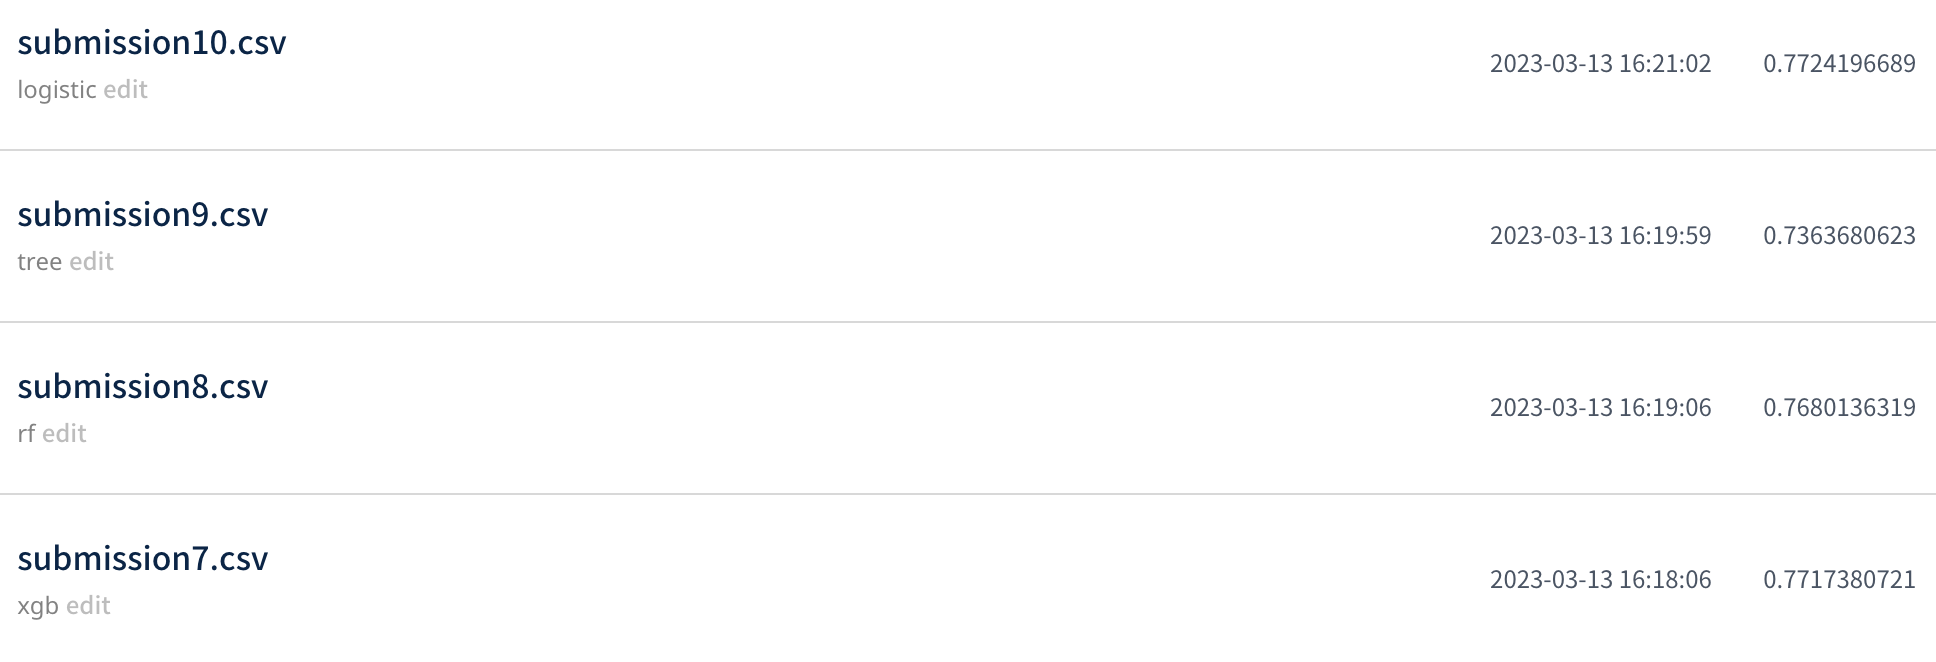